In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

1. Загрузите файл HR.csv в pandas dataframe

In [3]:
df = pd.read_csv("HR.csv")  
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# в данных нет пропущенных значений. это хорошои

2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [7]:
modes={col:df[col].mode()[0] for col in df.columns}
df_desc = df.describe()
m_series = pd.Series(data=modes, name="mode")
df_desc = df_desc.append(m_series, ignore_index=False)
print(df_desc)
#0.5 квантиль это медиана

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   
mode             0.100000         0.550000        4.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000

3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

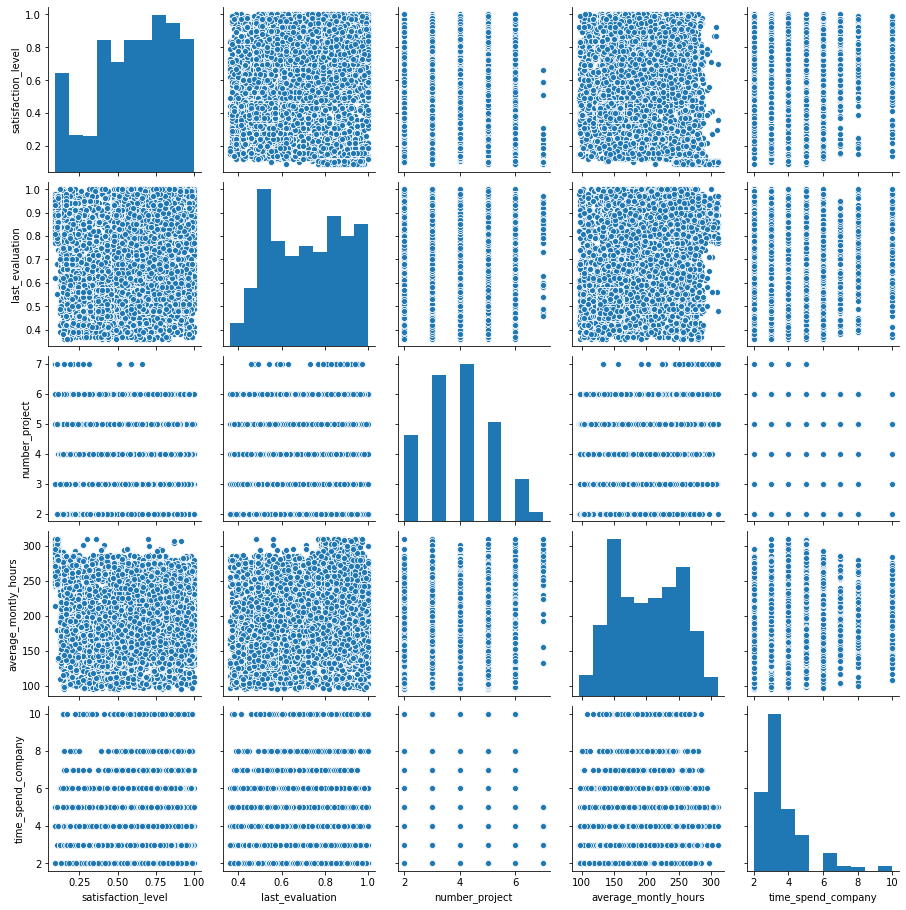

In [8]:
df_col = df[["satisfaction_level", "last_evaluation","number_project","average_montly_hours","time_spend_company" ]]

sns.pairplot(df_col)

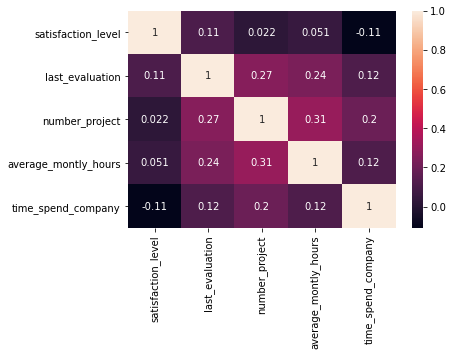

In [9]:
sns.heatmap(df_col.corr(method="kendall"), annot=True)

In [ ]:
#Зависимость между переменными не линейная.  Корреляция между переменными слабая. Наиболее сколеррированные 
# number_project с average_montly_hours с коэффициентом 0.31, наименее  number_project с satisfaction_level 
# с коэффициентом 0.022

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [10]:
df["department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

5. Показать распределение сотрудников по зарплатам. 

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


[Text(0, 0.5, 'Workers'), Text(0.5, 0, 'Salary')]

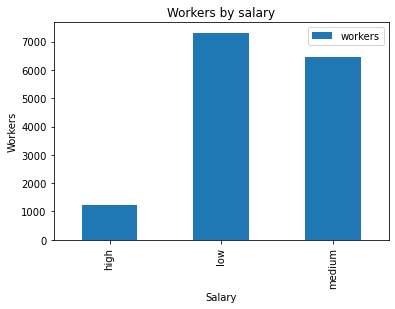

In [11]:
print(df["salary"].value_counts())
df_s = df.groupby("salary").count()
df_s.rename(columns = {'department':'workers'}, inplace = True) 
ax = df_s[["workers"]].plot(kind="bar", title='Workers by salary')
ax.set(xlabel="Salary", ylabel="Workers")


6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельностиb

salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


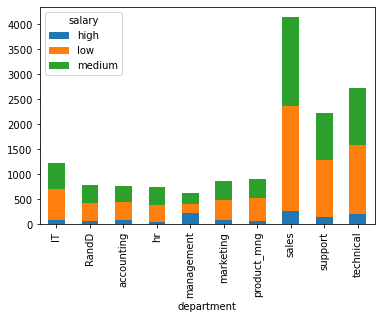

In [20]:
data = df.pivot_table(index='department', 
                      columns='salary', 
                      values='satisfaction_level', 
                      aggfunc='count')
print(data)
data.plot(kind='bar', stacked=True)

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [13]:
print(df.groupby("salary")["average_montly_hours"].mean())
a=0.05
#H0 Среднее время прибывание на работе сотрудников с высокой ЗП больше среднего время прибывание на работе сотрудников с
# низкой ЗП
#H1 Среднее время прибывание на работе сотрудников с высокой ЗП меньше среднего время прибывание на работе сотрудников с
# низкой ЗП

sal_high = df[df["salary"] == "high"]["average_montly_hours"]
sal_low = df[df["salary"] == "low"]["average_montly_hours"]

result = st.ttest_ind(sal_high, sal_low, equal_var=False)
print({"Statistic":result.statistic, "p-value":result.pvalue})
if (result.statistic < 0) & (result.pvalue / 2 < a):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую  гипотезу')
#Нет статистически значимой разницы между средними, не можем отвергнуть H0

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64
{'Statistic': -0.7624331665385475, 'p-value': 0.4459045542257889}
Не отвергаем нулевую  гипотезу


8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
   ● Доля сотрудников с повышением за последние 5 лет
   ● Средняя степень удовлетворенности
   ● Среднее количество проектов 

In [12]:
total_num = df["left"].count()

data = df[df["promotion_last_5years"]==1].groupby("left")["promotion_last_5years"].count().reset_index()
data["promotion_last_5years"] = data["promotion_last_5years"].apply(lambda val: val/total_num * 100)
data.rename(columns = {'promotion_last_5years':'promotion'}, inplace = True) 
print("Доля сотрудников с повышением за последние 5 лет для не уволившихся сотруднков", data.iloc[0]["promotion"])
print("Доля сотрудников с повышением за последние 5 лет для уволившихся сотруднков", data.iloc[1]["promotion"])

data = df.groupby("left")["satisfaction_level"].mean().reset_index()
data.rename(columns = {'satisfaction_level':'mean_leve'}, inplace = True) 
print("Средняя степень удовлетворенности для не уволившихся сотруднков", data.iloc[0]["mean_leve"])
print("Средняя степень удовлетворенности для уволившихся сотруднков", data.iloc[1]["mean_leve"])

data = df.groupby("left")["number_project"].mean().reset_index()
data.rename(columns = {'number_project':'mean_num_project'}, inplace = True) 
print("Среднее количество проектов  для не уволившихся сотруднков", data.iloc[0]["mean_num_project"])
print("Среднее количество проектов  для уволившихся сотруднков", data.iloc[1]["mean_num_project"])

Доля сотрудников с повышением за последние 5 лет для не уволившихся сотруднков 2.000133342222815
Доля сотрудников с повышением за последние 5 лет для уволившихся сотруднков 0.1266751116741116
Средняя степень удовлетворенности для не уволившихся сотруднков 0.666809590479516
Средняя степень удовлетворенности для уволившихся сотруднков 0.44009801176140917
Среднее количество проектов  для не уволившихся сотруднков 3.786664333216661
Среднее количество проектов  для уволившихся сотруднков 3.8555026603192384


9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


In [21]:
target = df["left"]
data=df.drop(['department','salary', 'left'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
accur = accuracy_score(y_test, lda.predict(X_test))
print("Accuracy:", accur)
print("Coefficients \n", lda.coef_)
#точность модели довольно хорошая 0.76
# не все параметры одинаково значимы, наиболеезначимым является уровень удовлетворённости работой, что не удивительно

Accuracy: 0.7605333333333333
Coefficients 
 [[-4.49981966e+00  7.61865495e-01 -2.36322996e-01  4.20180299e-03
   2.31302246e-01 -1.09857871e+00 -1.05259483e+00]]
